In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#SCikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = df.iloc[:, 2:4]

In [5]:
y = df['Purchased']

In [6]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling
sc = StandardScaler()
x_sc_train = sc.fit_transform(x_train)
x_sc_test = sc.transform(x_test)

In [8]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_sc_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
# Predicting the Test set results
y_prediction = classifier.predict(x_sc_test)

In [10]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_prediction)

In [11]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [12]:
# Accuracy of the model
print(np.abs(100 * np.abs(y_prediction - y_test).sum()/y_test.count() - 100))

90.0


### Visualising the Training set Results

<IPython.core.display.Javascript object>


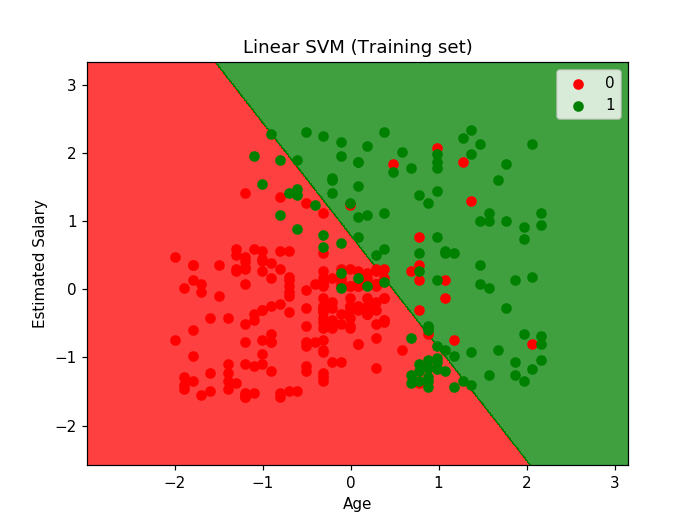

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [13]:
# Visualising the Training set results
%matplotlib notebook
from matplotlib.colors import ListedColormap
X_set, y_set = x_sc_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig('Linear SVM (Train set).png', dip = 500)
plt.show()

### Visualising the Test set Results

<IPython.core.display.Javascript object>


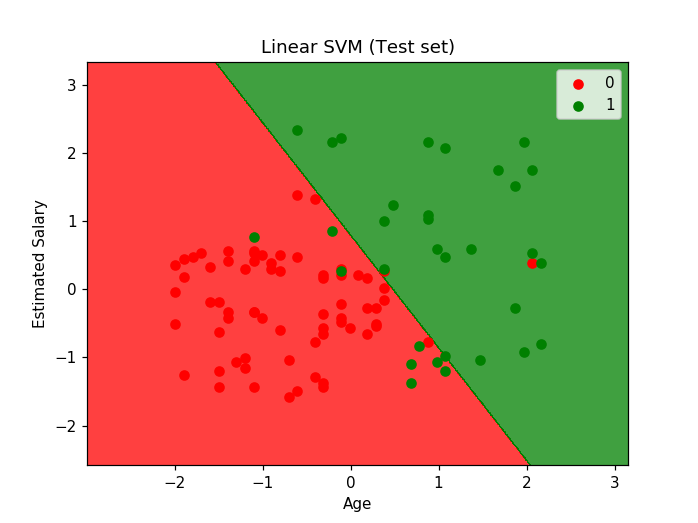

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [14]:
# Visualising the Test set results
%matplotlib notebook
from matplotlib.colors import ListedColormap
X_set, y_set = x_sc_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.savefig('Linear SVM (Test set).png', dip = 500)
plt.show()

<IPython.core.display.Javascript object>


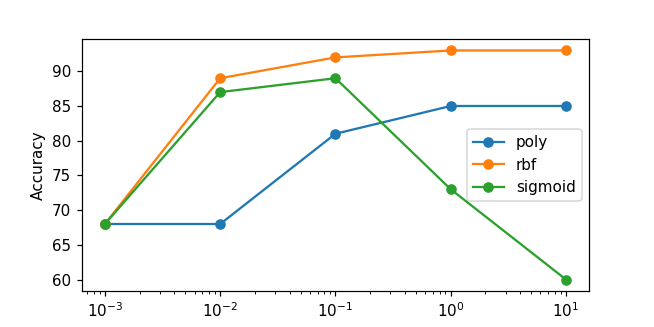

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [27]:
%matplotlib notebook
plt.figure(figsize = (6,3))
gammas = [0.001, 0.01, .1, 1, 10]
for kernel in ['poly', 'rbf', 'sigmoid']:
    
    for C in [1]:
        accuracy = []
        for gamma in gammas:
            classifier = SVC(C = C, kernel = kernel, random_state = 0, gamma = gamma)
            classifier.fit(x_sc_train, y_train)
            y_prediction = classifier.predict(x_sc_test)
            cm = confusion_matrix(y_test, y_prediction)
            #print(cm, 'gamma: {}, kernel: '.format(gamma), kernel)
            accuracy.append(np.abs(100 * np.abs(y_prediction - y_test).sum()/y_test.count() - 100))
            
        plt.plot(gammas, accuracy, label = kernel, marker = 'o')
plt.legend()
plt.xlabel('$\gamma$')
plt.ylabel('Accuracy')
plt.semilogx()
plt.tight_layout